In [ ]:
# Cell 1 – Imports & Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("whitegrid")

In [ ]:
# Cell 2 – Load Dataset
input_file = "tech_layoffs_til_2025.csv"
df = pd.read_csv(input_file)

df.head()

,Nr,Company,Location_HQ,Region,USState,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in__mil,Year,latitude,longitude
0,1,Tamara Mellon,Los Angeles,other,California,USA,North America,20.0,2020-03-12,40.0,50.0,30.0,Retail,Series C,90.0,2020,34.053691,-118.242766
1,2,HopSkipDrive,Los Angeles,other,California,USA,North America,8.0,2020-03-13,10.0,80.0,72.0,Transportation,Unknown,45.0,2020,34.053691,-118.242766
2,3,Panda Squad,San Francisco,San Francisco Bay Area,California,USA,North America,6.0,2020-03-13,75.0,8.0,2.0,Consumer,Seed,1.0,2020,37.779259,-122.419329
3,4,Help.com,Austin,other,Texas,USA,North America,16.0,2020-03-16,100.0,16.0,0.0,Support,Seed,6.0,2020,30.271129,-97.743700
4,5,Inspirato,Denver,other,Colorado,USA,North America,130.0,2020-03-16,22.0,591.0,461.0,Travel,Series C,79.0,2020,39.739236,-104.984862


In [ ]:
# Cell 3 – Data Cleaning
df = df.dropna(subset=["Company", "Date_layoffs", "Laid_Off"])

df["Date_layoffs"] = pd.to_datetime(df["Date_layoffs"])
df["Month"] = df["Date_layoffs"].dt.month
df["Year"] = df["Date_layoffs"].dt.year

df["Company"] = df["Company"].str.strip().str.title()
df["Industry"] = df["Industry"].str.strip().str.title()

df.head()

,Nr,Company,Location_HQ,Region,USState,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in__mil,Year,latitude,longitude,Month
0,1,Tamara Mellon,Los Angeles,other,California,USA,North America,20.0,2020-03-12,40.0,50.0,30.0,Retail,Series C,90.0,2020,34.053691,-118.242766,3
1,2,Hopskipdrive,Los Angeles,other,California,USA,North America,8.0,2020-03-13,10.0,80.0,72.0,Transportation,Unknown,45.0,2020,34.053691,-118.242766,3
2,3,Panda Squad,San Francisco,San Francisco Bay Area,California,USA,North America,6.0,2020-03-13,75.0,8.0,2.0,Consumer,Seed,1.0,2020,37.779259,-122.419329,3
3,4,Help.Com,Austin,other,Texas,USA,North America,16.0,2020-03-16,100.0,16.0,0.0,Support,Seed,6.0,2020,30.271129,-97.743700,3
4,5,Inspirato,Denver,other,Colorado,USA,North America,130.0,2020-03-16,22.0,591.0,461.0,Travel,Series C,79.0,2020,39.739236,-104.984862,3


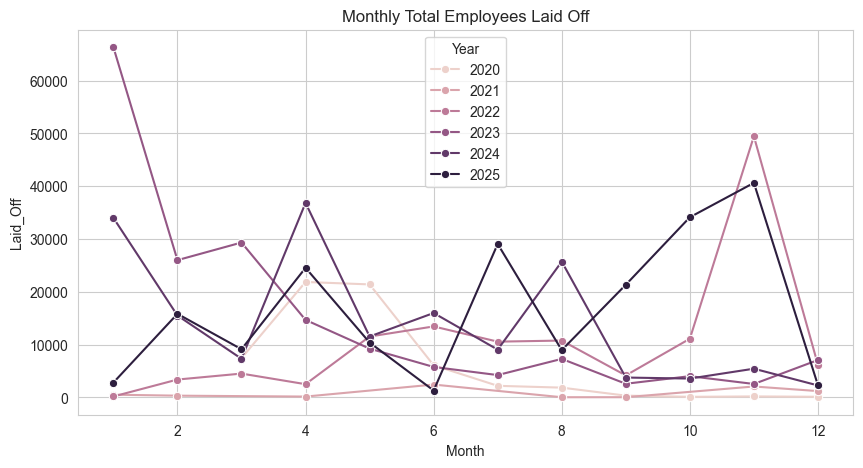

In [7]:
#Cell 4 – Monthly Layoffs (Show Plot Inline)
monthly = df.groupby(["Year", "Month"])["Laid_Off"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly, x="Month", y="Laid_Off", hue="Year", marker="o")
plt.title("Monthly Total Employees Laid Off")
plt.show()

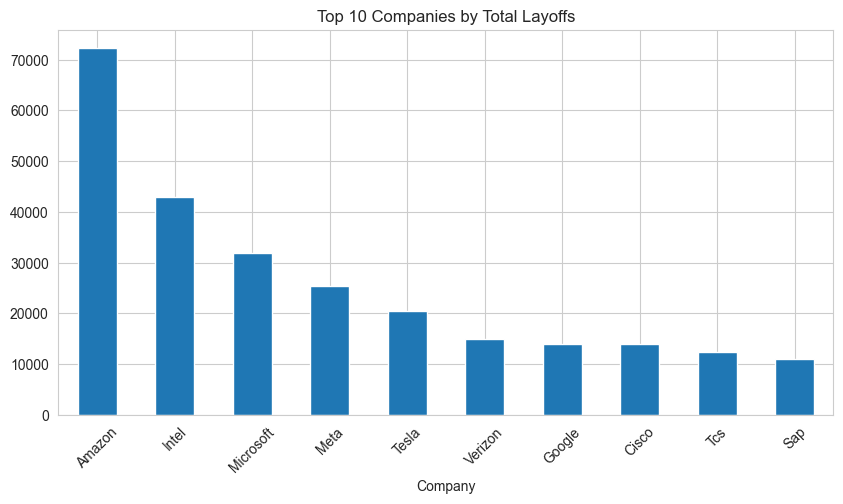

In [8]:
#📘 Cell 5 – Top 10 Companies
top_companies = df.groupby("Company")["Laid_Off"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_companies.plot(kind="bar")
plt.title("Top 10 Companies by Total Layoffs")
plt.xticks(rotation=45)
plt.show()

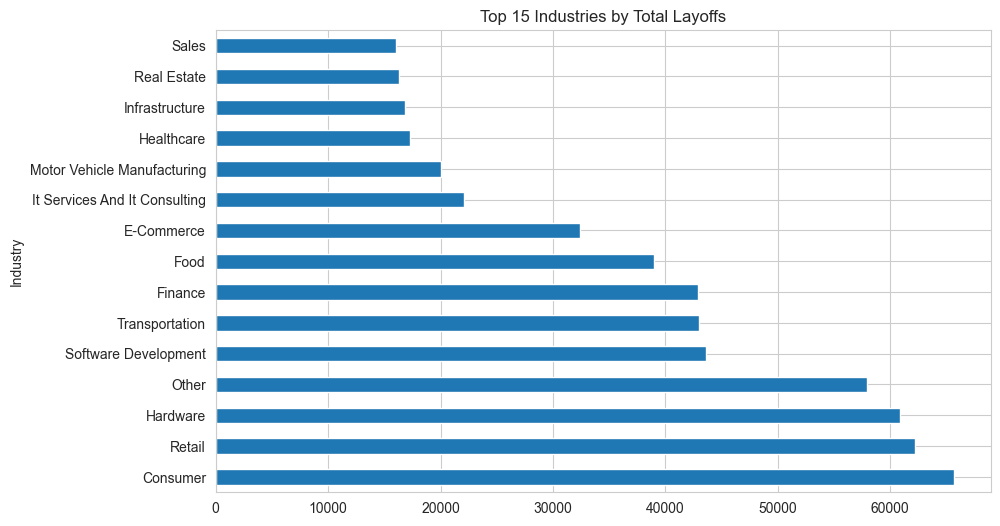

In [9]:
#📘 Cell 6 – Industry Analysis
industry_totals = df.groupby("Industry")["Laid_Off"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
industry_totals.head(15).plot(kind="barh")
plt.title("Top 15 Industries by Total Layoffs")
plt.show()